# Gaussian Blur, Medical Images

### Import resources and display image

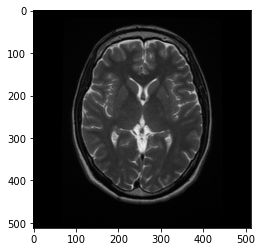

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Gaussian blur the image

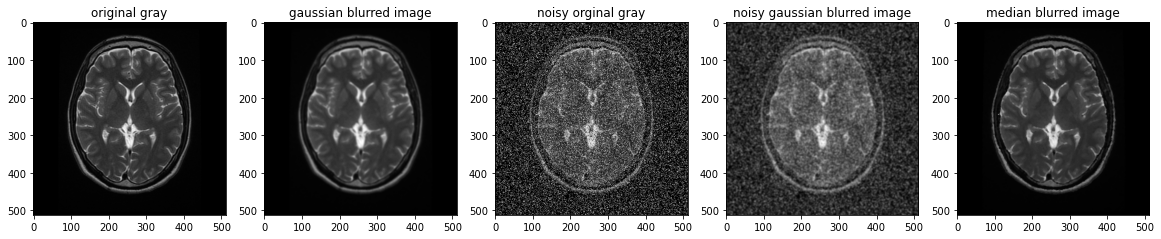

In [14]:
# Convert to grayscale for filtering


gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

noise_img = random_noise(gray, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Create a Gaussian blurred image
gray_median_blur = cv2.medianBlur(noise_img,5)
gray_gaussian_blur = cv2.GaussianBlur(gray,(9,9),0)
gray_noisy_gaussian_blur = cv2.GaussianBlur(noise_img,(9,9),0)

f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('gaussian blurred image')
ax2.imshow(gray_gaussian_blur, cmap='gray')

ax3.set_title('noisy orginal gray')
ax3.imshow(noise_img, cmap='gray')

ax4.set_title('noisy gaussian blurred image')
ax4.imshow(gray_noisy_gaussian_blur, cmap='gray')

ax5.set_title('median blurred image')
ax5.imshow(gray_median_blur, cmap='gray')

### Test performance with a high-pass filter

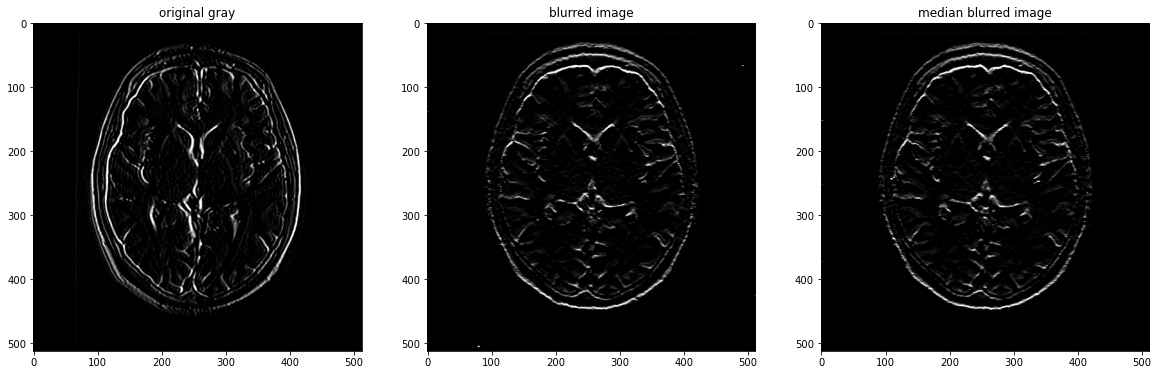

In [18]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)

filtered_median_blurred = cv2.filter2D(gray_median_blur,-1,sobel_y)
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

ax3.set_title('median blurred image')
ax3.imshow(filtered_median_blurred, cmap='gray')

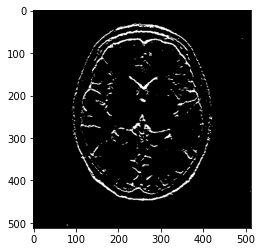

In [17]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
